In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE= 256
BATCH_SIZE=32
CHANNELS= 3


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",shuffle = True,image_size=(IMAGE_SIZE ,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

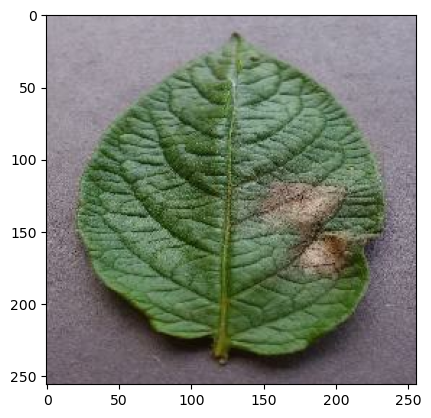

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

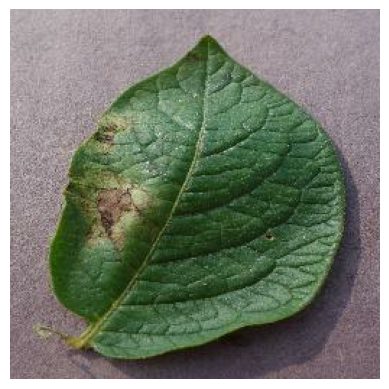

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

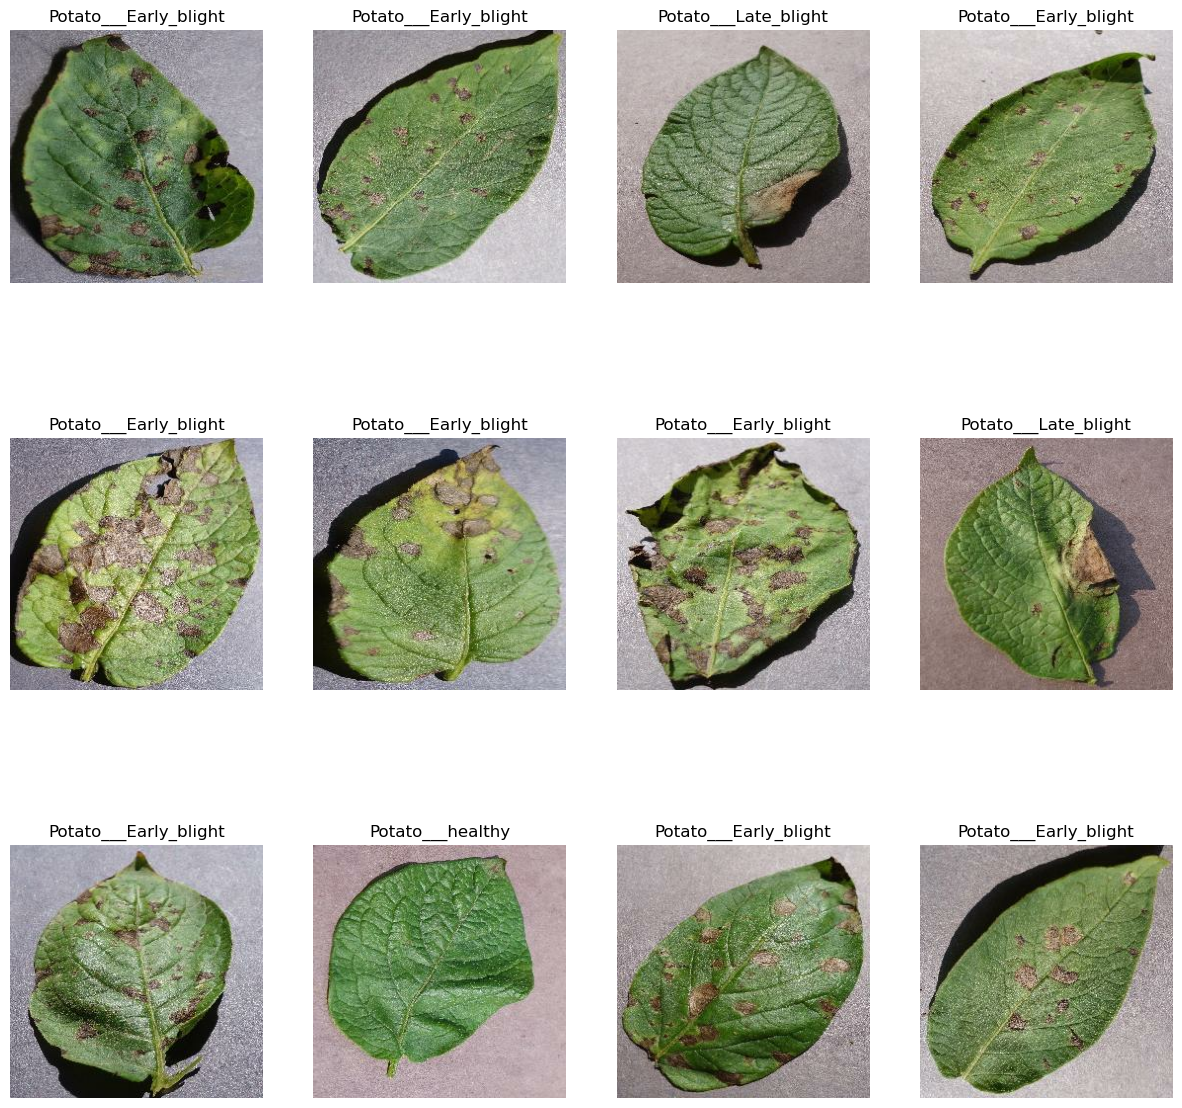

In [10]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))   
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        
    


In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(516)
len(train_ds)

68

In [13]:
test_ds =  dataset.skip(516)
len(test_ds)

0

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(64)
len(val_ds)

0

In [16]:
test_ds =test_ds.skip(64)
len(test_ds)


0

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1 , shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).take(val_size)
    
    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds= get_dataset_partitions_tf(dataset)

In [19]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [23]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
EPOCHS=50

history=  model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 42s 724ms/step - loss: 0.9112 - accuracy: 0.4890 - val_loss: 0.9009 - val_accuracy: 0.4271
Epoch 2/50
54/54 [==============================] - 36s 662ms/step - loss: 0.6683 - accuracy: 0.6962 - val_loss: 0.8650 - val_accuracy: 0.5365
Epoch 3/50
54/54 [==============================] - 36s 659ms/step - loss: 0.4810 - accuracy: 0.7946 - val_loss: 0.4209 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 36s 669ms/step - loss: 0.3692 - accuracy: 0.8542 - val_loss: 0.3467 - val_accuracy: 0.8646
Epoch 5/50
54/54 [==============================] - 36s 669ms/step - loss: 0.3412 - accuracy: 0.8704 - val_loss: 0.3875 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 38s 702ms/step - loss: 0.2508 - accuracy: 0.9057 - val_loss: 0.4994 - val_accuracy: 0.8385
Epoch 7/50
54/54 [==============================] - 37s 683ms/step - loss: 0.2109 - accuracy: 0.9271 - val_loss: 0.1884 - val_accuracy: 0.93

In [26]:
scores= model.evaluate(test_ds)

6/6 [==============================] - 2s 147ms/step - loss: 0.2886 - accuracy: 0.9010


In [27]:
scores


[0.2886146306991577, 0.9010416865348816]

In [28]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

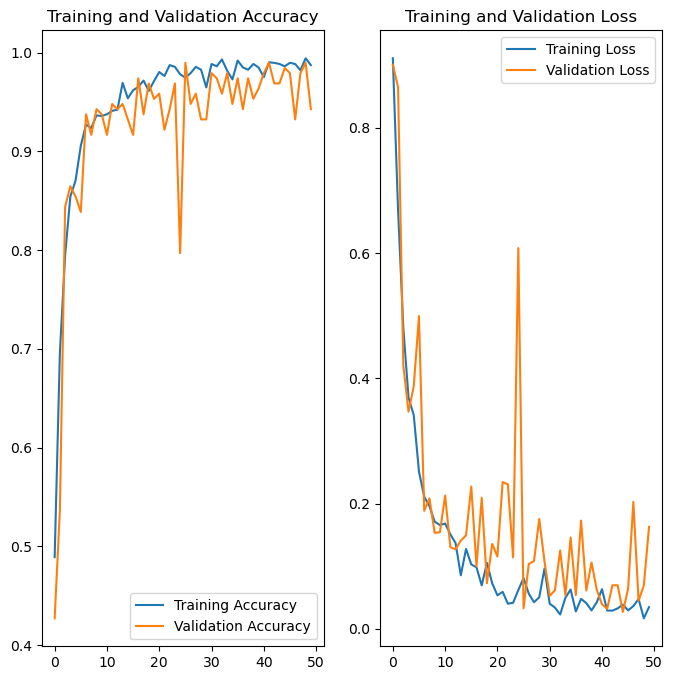

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS) , acc , label = "Training Accuracy")
plt.plot(range(EPOCHS) , val_acc , label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS) , loss , label = "Training Loss")
plt.plot(range(EPOCHS) , val_loss , label = "Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()



first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 339ms/step
predicted label:  Potato___Late_blight


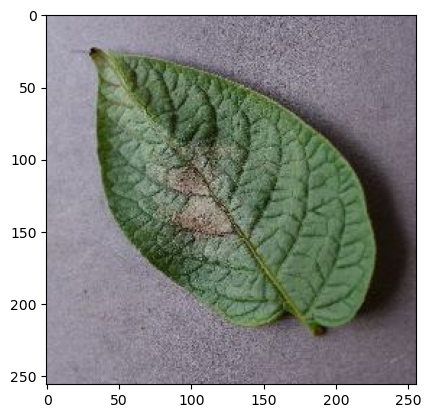

In [30]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print( "predicted label: " , class_names[np.argmax(batch_prediction[0])])

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creates a batch
    
    predictions= model.predict(img_array)
    
    predicted_class= class_names[np.argmax(predictions[0])]
    confidence= round(100* (np.max(predictions[0])) , 2)
    return predicted_class,confidence

1/1 [==============================] - 0s 26ms/step


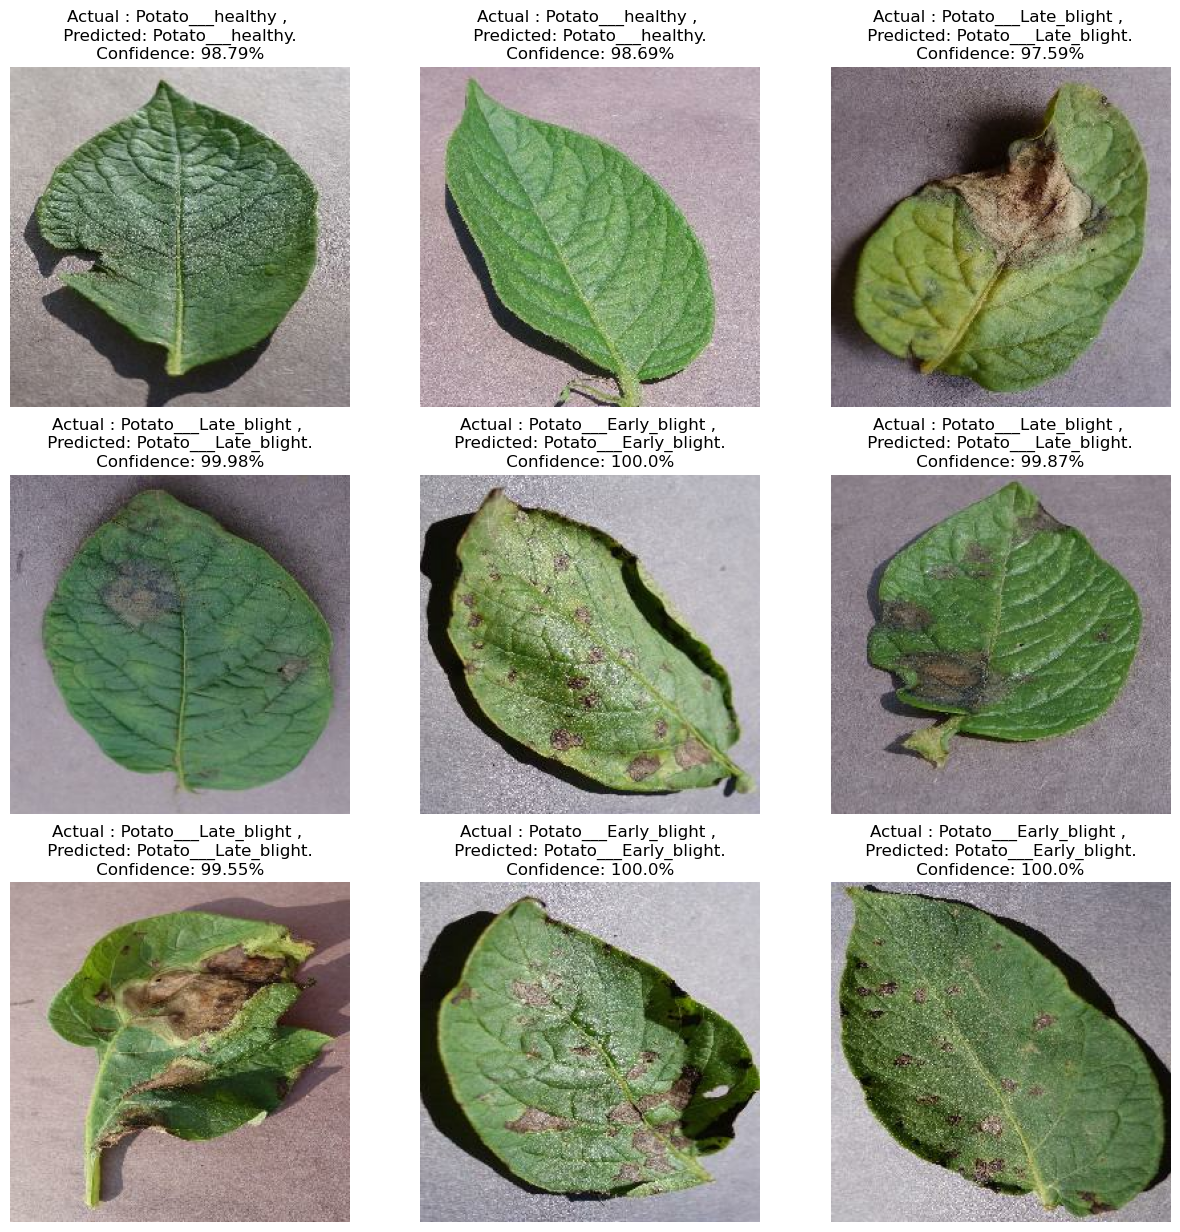

In [32]:
plt.figure(figsize=(15,15))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class= class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class} , \n Predicted: {predicted_class}. \n Confidence: {confidence}% ")
        plt.axis("off")

In [33]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [34]:
model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [35]:
model_version = 3
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
